   
# Cardio Good Fitness Project

## Context:
Cardio Good Fitness is a retail store that sales treadmill machines of various models. Data containing machine sales and corresponding general customer information is gathered in the CardioGoodFintess.csv for analysis.
#### CSV file contains the following variables:
1. Product - the model no. of the treadmill
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run

## Objective:
Explore the dataset, extract basic observations and execute statistical data analysis to:
1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers

## Approach used in the project:
1. Perform Exploratory Data Analysis to gain insight on the data and characteristics of the attributes
2. Analize existing customer data base (Age, Marital status, Income, Education, Fitness level and planned machine usage)
3. Analize any relationship of the abovementioned attributes on the machine sales in general and individual model in particular
4. Perform multivariate analysis to discover any possible relationship between data attributes
5. Construct summury to target new customers in general and by machine type

## 1. Understanding the structure of the data
- Overview of the dataset shape, datatypes
- Statistical summary and missing values check

<font color = 'blue'>
    
### 1.1 Loading Python packages and data

In [1]:
# Load all necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid') # Setting grid backgournd for plots
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
data = pd.read_csv('CardioGoodFitness.csv')

<font color = 'blue'>
    
### 1.2 Checking the dataset

In [3]:
# Displaying first 5 rows of the dataset

data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Displaying last 5 rows of the dataset

data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [5]:
# Checking size of the dataset (number of rows, columns)

data.shape

(180, 9)

In [6]:
# Checking columns names
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
# Checking column names and corresponding data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
# Counting number of the data types present

data.dtypes.value_counts()

int64     6
object    3
dtype: int64

In [9]:
# Checking if data contains any missing values that need to be dropped out as some plots might not work

data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<font color = 'darkblue'>
    
**Observation:**
    
1. Dataset contains 9 columns and 180 rows
2. Two datatypes present - 6 integer (Age, Education, Usage, Fitness, Income, Miles) and 3 string (Product, Gender, MaritalStatus)
3. Dataset does not contain any missing values


In [10]:
# Finding unique names of treadmill machines sold

pd.unique(data['Product'])

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [11]:
#Finding total number of machines sold by type

data.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [12]:
# Extracting basic statistical summary of the dataset

data.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


<font color = 'darkblue'>
    
**Observation:**
    
1. Customer age varies from 18 to 50 years, Mean 28.8 and Median 26
2. Customers have education of 12 to 21 years with Mean and Median of 16
3. Customers income ranges from ~29500 to ~104500 USD, Mean of 53700 and Median ~50500
4. Survey reveals customers identifying their level of fitness of 3 on average and planning to use their machines 3 times a week
5. Customers usage goal is 103 miles on Average and 94 Median
6. 3 types of treadmill machines available - TM195, TM498 and TM798
7. TM195 has most sales of 80, TM498 - 60, TM798 is the least of 40 per given period

## 2. Univariate Data Analysis
Next step is to visualize statistical plots for various important variables (age,
education, income, usage, miles, income, product, gender, marital status, fitness) to obtain basic understanding of their characteristics

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

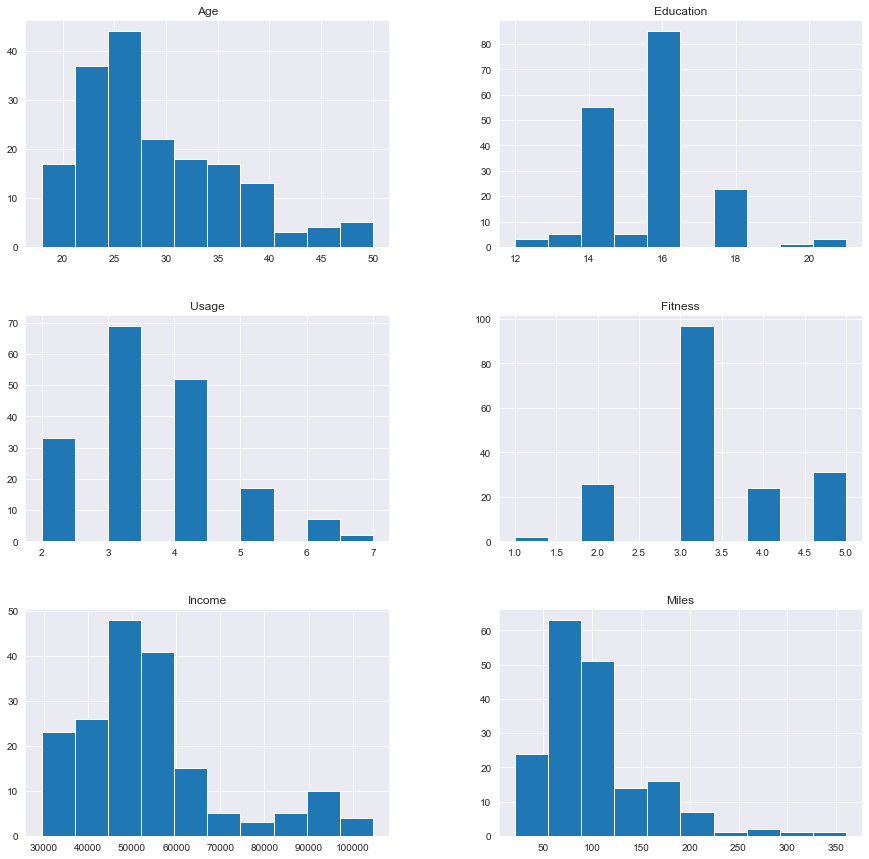

In [13]:
# Creating histogram set for quanititative data - Age, Education, Usage, Fitness, Income and Miles

data.hist(figsize=(15,15))

<font color = 'darkblue'>
    
**Observation:**
1. Customer age is between 18 and 50 years, skewed to the rihgt, majority lying between 18 and 40 years, smaller portion of customers above 40 years
2. Customer education varies, majority having 16 years total (college/undergraduate completed), slightly lesser have 14 years of education (most likely current students), other significant group is of 18 years education. All other representatives are minority buyers
3. Customer income varies from around 30 to 105 thousand, majority being around 45-50. There is also a group of higher earning customers
4. Customer fitness level is measure on 5 point scale, with 3 being most common
5. Customers will mostl likely use their machines 2-4 times a week
6. Customers are planning to run from 20 to 230 miles/week, 75 being the most

<font color = 'blue'>
    
### 2.1 Analyzing customer information

Via Distribution plots (with kde and data presence tick marks) and Box plots


<AxesSubplot:xlabel='Age'>

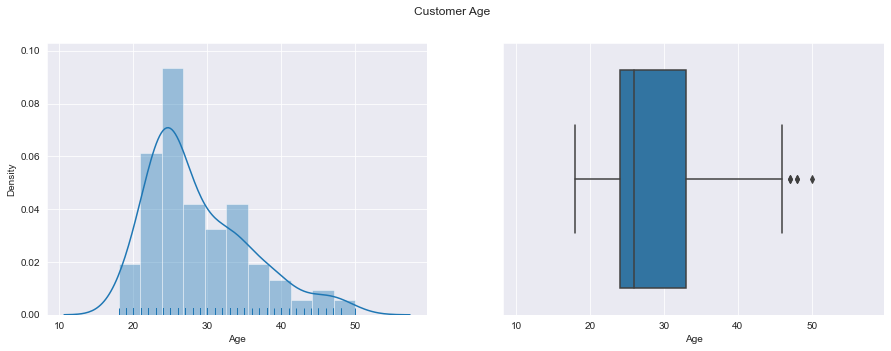

In [14]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Customer Age')

sns.distplot(data['Age'], rug=True, ax=axes[0]);
sns.boxplot(data['Age'], ax=axes[1])
#axvline(data.mean())

<font color = 'darkblue'>
    
**Observation:**
1. Customer age is between 18 and 50 years, mode is around 25
2. Customer age distribution is skewed to the right
3. Interquartile range lies between 24 and 33, with several outliers above 47

<AxesSubplot:xlabel='Income'>

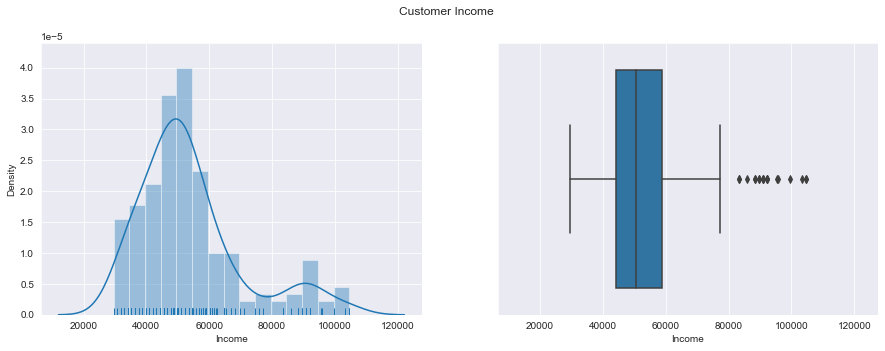

In [15]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Customer Income')

sns.distplot(data['Income'], rug=True, ax=axes[0]);
sns.boxplot(data['Income'], ax=axes[1])
#axvline(data.mean())

<font color = 'darkblue'>
    
**Observation:**
1. Customer income is between 30000  and 105000, mode is around 52000
2. Distribution is skewed to the right, another local peak around 90000
3. Interquartile range lies between 44 and 59 thousand, statistically income above 80 thousand is considered as being extremes

<AxesSubplot:xlabel='Education'>

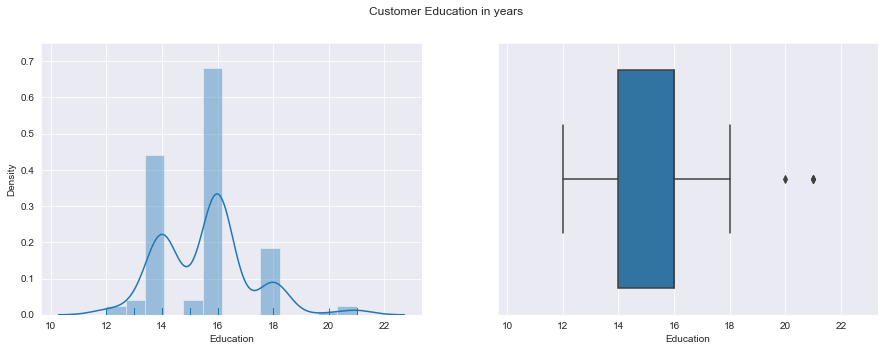

In [16]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Customer Education in years')

sns.distplot(data['Education'], rug=True, ax=axes[0]);
sns.boxplot(data['Education'], ax=axes[1])
#axvline(data.mean())

<font color = 'darkblue'>
    
**Observation:**
1. Customer total education is between 12  and 21 years, mode is around 16
2. Interquartile range lies between 14 and 16, higher educated individuals are considered as outliers in the customer base

<AxesSubplot:xlabel='Fitness'>

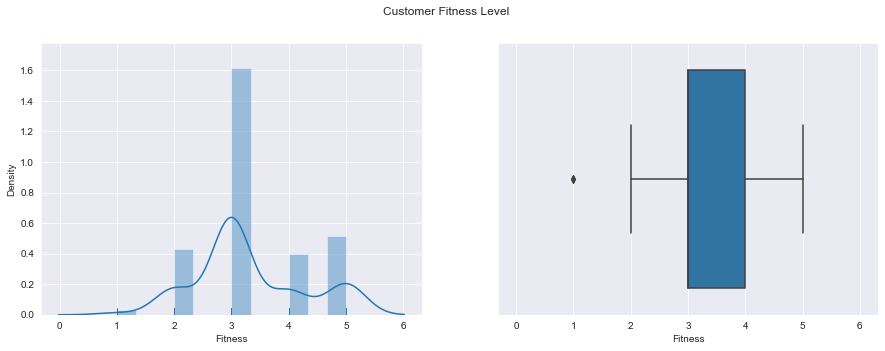

In [17]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Customer Fitness Level')

sns.distplot(data['Fitness'], rug=True, ax=axes[0]);
sns.boxplot(data['Fitness'], ax=axes[1])
#axvline(data.mean())

<font color = 'darkblue'>
    
**Observation:**
1. Customer fitness level is measure in 5 levels, 3 being the most common
2. Majority of the customers are of fitness level 3 and 4. Unfit customers also purchase the machines, however are outliers for analysis purposes

<font color = 'blue'>
    
### 2.2 Expected machine usage per week

<AxesSubplot:xlabel='Miles'>

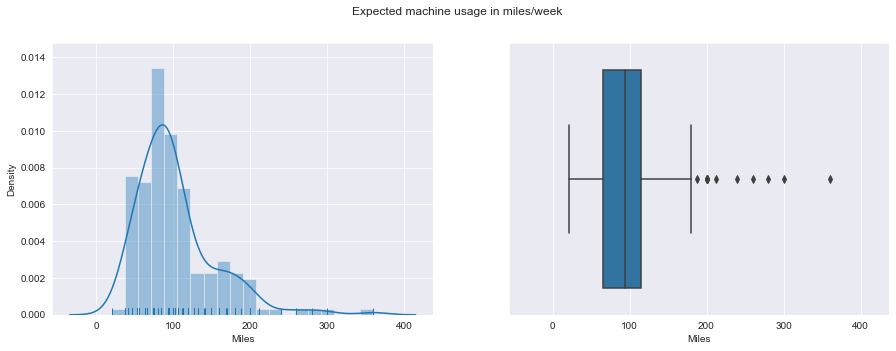

In [18]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Expected machine usage in miles/week')

sns.distplot(data['Miles'], rug=True, ax=axes[0]);
sns.boxplot(data['Miles'], ax=axes[1])
#axvline(data.mean())

<font color = 'darkblue'>
    
**Observation:**
1. Customer plan to run around 90 miles per week
2. Distribution is skewed to the right
3. Majority are planning to use the machines 65-115 miles/week
4. Some indiviuals will be using more heavily, however for this analysis are considered on the extreme side

<AxesSubplot:xlabel='Usage'>

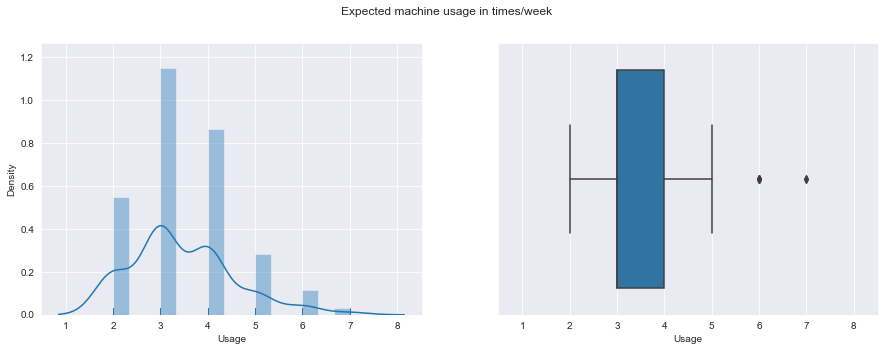

In [19]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Expected machine usage in times/week')

sns.distplot(data['Usage'], rug=True, ax=axes[0]);
sns.boxplot(data['Usage'], ax=axes[1])
#axvline(data.mean())

<font color = 'darkblue'>
    
**Observation:**
1. Most commonly customers plan to use the machines round 3 times per week
2. Distribution is slightly skewed to the right
3. Majority are planning to use the machines 3-4 times/week
4. Some indiviuals will be using more heavily, however for this analysis are considered on the extreme side

<font color = 'blue'>
    
### 2.3 Treadmill sales by type

<AxesSubplot:xlabel='Product', ylabel='count'>

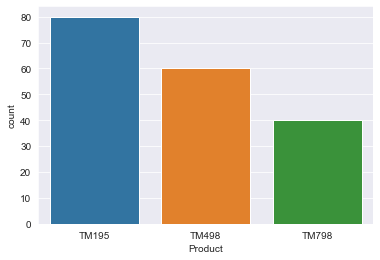

In [20]:
# Product column is a categorical data, using countplot() to count the total number of occurances per unique value

sns.countplot(data['Product'])

<font color = 'darkblue'>
    
**Observation:** Out of 3 types of treadmill machines being sold TM195 has most sales of 80 and TM798 least of 40

## 3. Combined Univariate and Bivariate analysis to gain more insight on machine sales vs various factors to aid in building customer profile
Next step is to visualize multivariate statistical plots for various important variables (age,
education, income, usage, miles, income, product, gender, marital status, fitness) to obtain understanding of the attribute relationships.

<font color = 'blue'>
    
### 3.1 Customer gender analysis

<AxesSubplot:xlabel='Product', ylabel='count'>

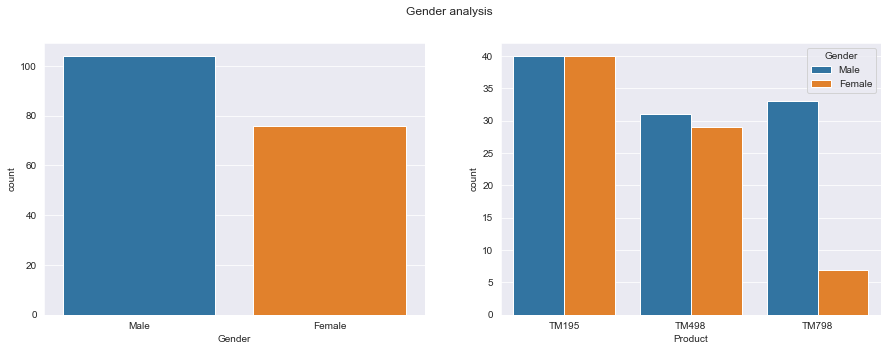

In [21]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Gender analysis')

# Total sales breakdown by gender
sns.countplot(data['Gender'], ax=axes[0])

#Sales breakdown of machines by gender
sns.countplot(data['Product'], hue=data['Gender'], ax=axes[1])
#axvline(data.mean())

<font color = 'darkblue'>
    
**Observation:** Treadmill machine type sales varied by gender
1. Male customers tend to buy more often than female
2. TM195 and TM498 are purchased almost equally by both males and females
3. There is a great difference in cutomer gender for TM798, males being the majority of buyers

<font color = 'blue'>
    
### 3.2 Customer marital status analysis

<AxesSubplot:xlabel='Product', ylabel='count'>

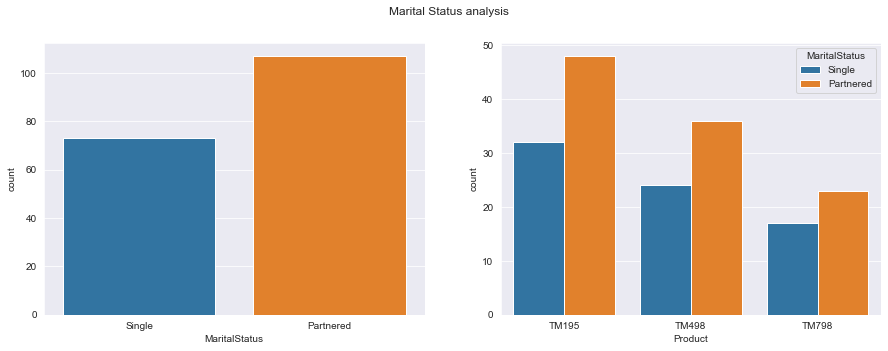

In [22]:
# Setting the subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Marital Status analysis')

# Total sales breakdown by marital status
sns.countplot(data['MaritalStatus'], ax=axes[0])

#Sales breakdown of machines by gender
sns.countplot(data['Product'], hue=data['MaritalStatus'], ax=axes[1])

<font color = 'darkblue'>
    
**Observation:**
1. Partnered customers tend to buy more machines than single
2. Partnered customers are more freqent buyers of treadmill machines regardless of the model

<font color = 'blue'>
    
### 3.3 Customer Fitness level analysis

<AxesSubplot:xlabel='Product', ylabel='count'>

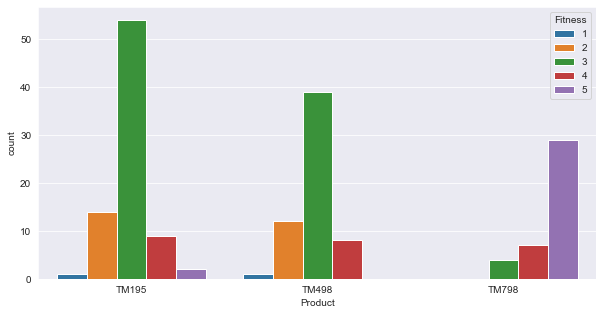

In [23]:
#Sales breakdown of machines by fitness level

plt.figure(figsize=(10,5))  # setting the figure size
sns.countplot(data['Product'], hue=data['Fitness'])

<font color = 'darkblue'>
    
**Observation:**
1. Customers with average fitness level of 3 tend to buy models TM195 and TM498. Customers with level 2 and 4 also buy these models more compared to the more advanced TM798. Customers with lowest fitness level of 1 also might express interest in these models.
2. Model TM798 is purchased by more fit customers. Majority are customers with highest fitness level of 5, only third of which are fitness levels 3 and 4 combined.

<font color = 'blue'>
    
### 3.4 Customer Income analysis

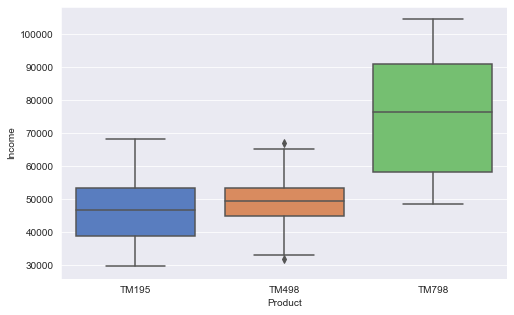

In [24]:
#Sales breakdown of machines by income

plt.figure(figsize=(8,5))  # setting the figure size
ax = sns.boxplot(x='Product', y='Income', data=data, palette='muted')  # barplot

<font color = 'darkblue'>
    
**Observation:**
1. Most customers buying models TM195 have income between 40 and 53 thoussand
2. Customers of TM498 have comparative income as for TM195, being more narrow in 45-53 range
2. Customers of TM798 have higher income, 60 to 90 thousand

<font color = 'blue'>
    
### 3.5 Machine usage analysis

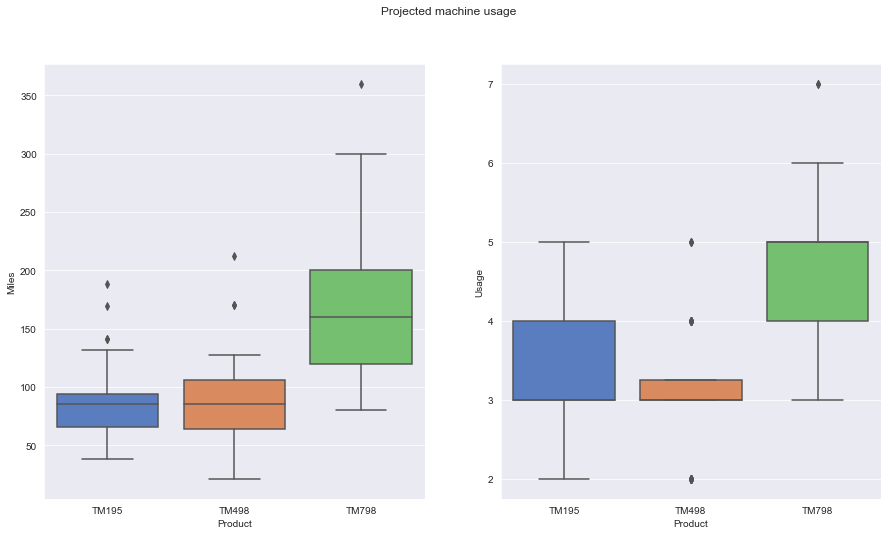

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [25]:
#Sales breakdown of machines by projected usage in miles/week and times/week

# Setting the subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Projected machine usage')

# Machine usage in miles/week by type
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.boxplot(x='Product', y='Miles', data=data, palette='muted', ax=axes[0])  # barplot

# Machine usage in time/week by type
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.boxplot(x='Product', y='Usage', data=data, palette='muted', ax=axes[1])  # barplot

<font color = 'darkblue'>
    
**Observation:**
1. Customers buying models TM195 and TM498 will be running on average 70 to 100 miles a week
2. Customers of TM798 will be using machines heavily of 120-200 miles/week
3. Model TM195 will be used 3-4 times on average
4. Model TM 498 will be used more stable around 3 times/week
2. Model TM798 will be used the heaviest, 4-5 times/week

<font color = 'blue'>
    
### 3.6 Customer age analysis

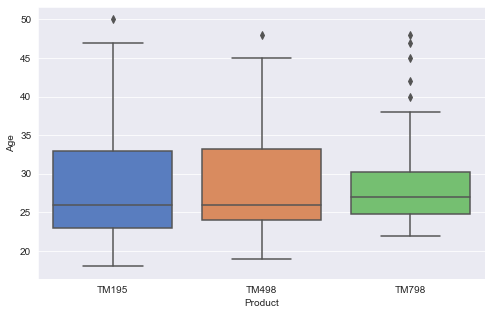

In [26]:
#Sales breakdown of machines by Age

plt.figure(figsize=(8,5))  # setting the figure size
ax = sns.boxplot(x='Product', y='Age', data=data, palette='muted')  # barplot

<font color = 'darkblue'>
    
**Observation:**
1. There is no significant customer age difference for models TM195 and TM498, age group mostly between 23 and 33 years
2. Customers bying TM798 have more narrow age group of 25-30 in majority

## 4. Bivariate analysis and correlations
Next step is to visualize bivariate pair plots for various important variables (age,
education, income, usage, miles, income, fitness) to obtain understanding of their possible relationships and correlations via correlation matrix and a visual heatmap

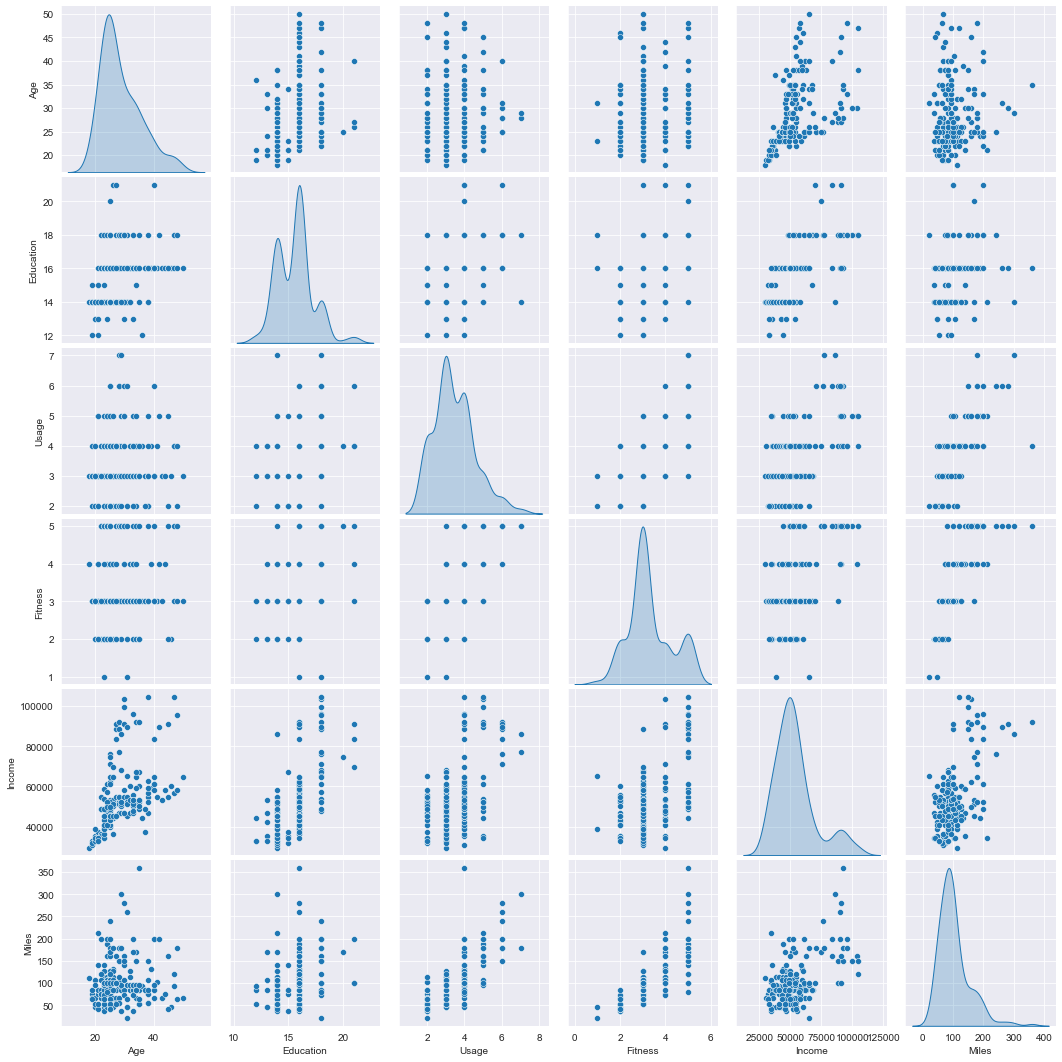

In [27]:
# Creating pair plot display between numerical columns to understand their relationship

sns.pairplot(data, diag_kind="kde")

In [28]:
# Displaying correlation table for all numerical columns

data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

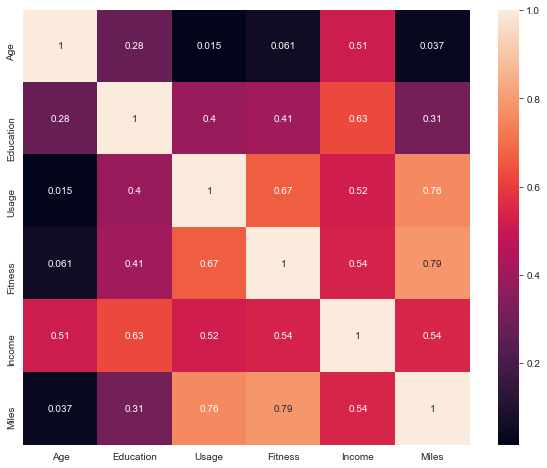

In [29]:
# Displaying visual correlations via heatmap

plt.figure(figsize=(10,8))  # setting the figure size
sns.heatmap(data.corr(), annot=True)

<font color = 'darkblue'>
    
**Observation:**
1. Highest positive strong correlations (>0.7) are for Fitness level and Miles/Usage, Miles and Usage
2. Good posive correlation (>0.6) found for Income and Education
3. Other positive correlation (0.5) include Income and Age, Income and Usage, Income and Fitness
4. No negative correlation found in data

## 5. Conclusion and Recommendations

### Typical customer profile:
1. Male partnered individual
2. Between 24 and 33 years of age
3. Have 14-16 years of education
4. Earn between 44 and 59 thousand USD
5. Identify their level of fitness between 3 and 4 on a 5 point scale
6. Plan to use the machine 3-4 times/week with 65-115 running miles/week

### Customer profile for TM195
1. Male and Female equally
2. Age group mostly between 23 and 33 years
3. Fitness level of 3
4. Individuals earning between 40 and 53 thousand
5. Usage around 3-4 times/week
6. Running on average 70 to 100 miles a week

### Customer profile for TM498
1. Male and Female equally
2. Age group mostly between 23 and 33 years
3. Fitness level of 3
4. Individuals earning between 45 and 53 thousand
5. Usage around 3 times/week
6. Running on average 70 to 100 miles a week

### Customer profile for TM798
1. Predominantly male customers
2. Narrow age group of 25-30
3. Fitness level of 5
4. Higher earning individuals, 60 to 90 thousand
5. Heavy usage around 5 times/week
6. Longest runners, 120-200 miles/week

### Conclusion:

1. TM195 and TM498 models have very similar customer profile, model chosen mainly upon customer preference
2. TM798 is usually bought by more fit individuals who are planning to use machines more and usually have higher earning potential